### Welcome to your first Data Project!
Check out the Kaggle Titanic Challenge at the following link:

https://www.kaggle.com/c/titanic-gettingStarted



In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
titanic_df = pd.read_csv('train.csv')

### Survived 0=Not;1=Yes
### SibSp=Sibling or Spouse (like above)
### Parch=Parent or Children(like above

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### First some basic questions:

### 1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
### 2.) What deck were the passengers on and how does that relate to their class?
### 3.) Where did the passengers come from?
### 4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

### 5.) What factors helped someone survive the sinking?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Question 1

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


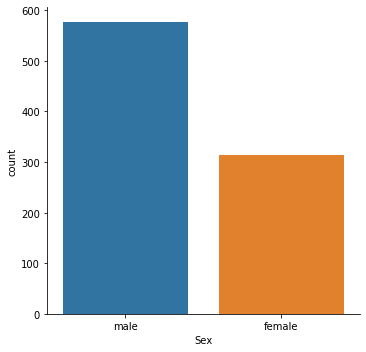

In [7]:
# gender
sns.factorplot('Sex',data=titanic_df,kind='count')

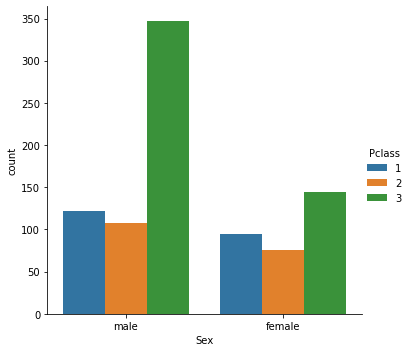

In [8]:
# gender by pclass
sns.factorplot('Sex',data=titanic_df,kind='count',hue='Pclass')

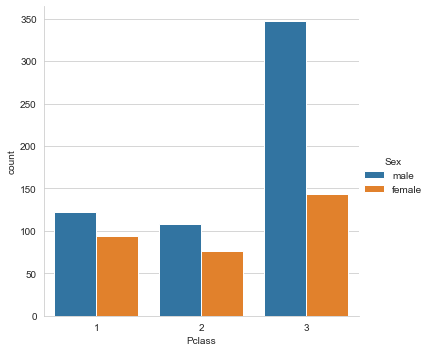

In [9]:
# reverse the legend to column
sns.set_style('whitegrid')
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Sex')

In [10]:
# we'd like to count how many children
# children is age under 16
# create def function
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [11]:
#1 creating new column named person
#2 grabbing the sex and age column
# apply the def function to it
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


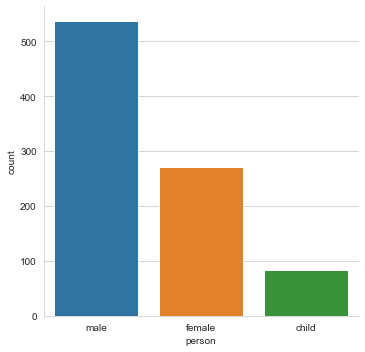

In [12]:
# now we draw the bar
sns.set_style('whitegrid')
sns.factorplot('person',data=titanic_df,kind='count')

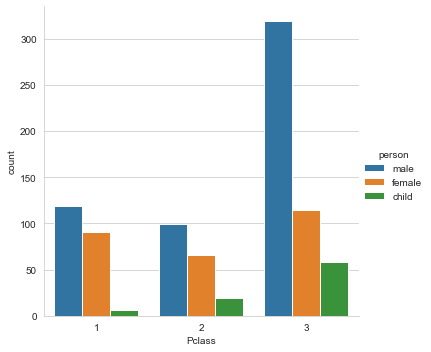

In [13]:
sns.set_style('whitegrid')
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='person')

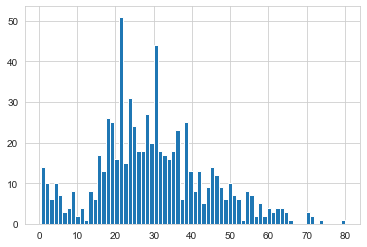

In [14]:
# to find out the age distibution with histogram
titanic_df['Age'].hist(bins=70)

In [15]:
# to find out the age average
titanic_df['Age'].mean()

29.69911764705882

In [16]:
# to find out exact number of person
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

### KDE PLot

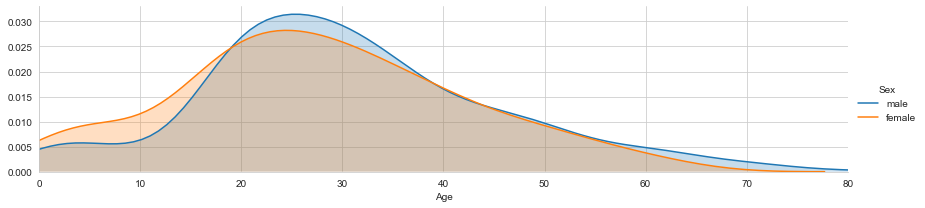

In [17]:
# create fig object by facetgrid, hue=sex, aspect=4
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

# mapping fig object with the kde Plot
fig.map(sns.kdeplot,'Age',shade=True)

# create oldest function to find out the max of age
oldest = titanic_df['Age'].max()

# set the limit from 0 to oldest
fig.set(xlim=(0,oldest))

# add the legend
fig.add_legend()

###  change the KDE plot above with person column so we find out the age distribution of children

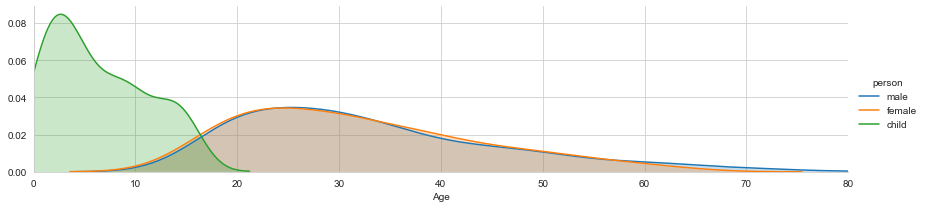

In [18]:
# create fig object by facetgrid, hue=person, aspect=4
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

# mapping fig object with the kde Plot
fig.map(sns.kdeplot,'Age',shade=True)

# create oldest function to find out the max of age
oldest = titanic_df['Age'].max()

# set the limit from 0 to oldest
fig.set(xlim=(0,oldest))

# add the legend
fig.add_legend()

### KDE Plot of age by passenger class

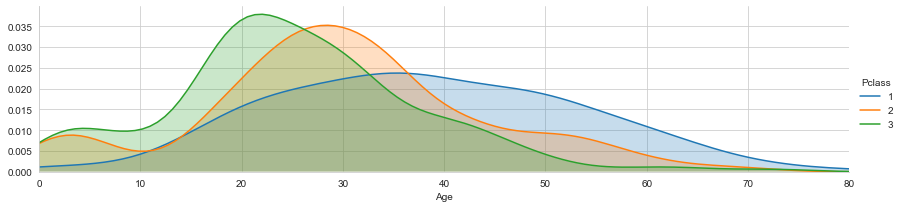

In [19]:
# create fig object by facetgrid, hue=Pclass, aspect=4
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

# mapping fig object with the kde Plot
fig.map(sns.kdeplot,'Age',shade=True)

# create oldest function to find out the max of age
oldest = titanic_df['Age'].max()

# set the limit from 0 to oldest
fig.set(xlim=(0,oldest))

# add the legend
fig.add_legend()

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [20]:
# create a new column named deck from cabin and remove the null within
deck = titanic_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

### To slice the first letter of cabin and count it

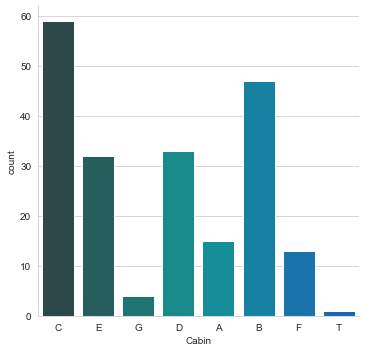

In [25]:
# create empty list
levels = []

# loop each value of deck
for level in deck:
    # append the first letter of deck to levels
    levels.append(level[0])
    
# create dataframe called cabin_df from loop function above (levels=list of first letter)     
cabin_df = DataFrame(levels)
#name the column of cabin_df as Cabin
cabin_df.columns = ['Cabin']

# create count factorplot from Cabin of cabin_df dataframe
# palette is the colormaps
sns.factorplot('Cabin',data=cabin_df,kind='count',palette='winter_d')

In [26]:
# drop the T and redefine cabin_df (permanently)
cabin_df = cabin_df[cabin_df.Cabin != 'T']

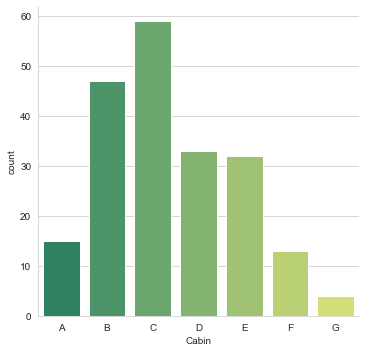

In [28]:
sns.factorplot('Cabin',data=cabin_df,kind='count',order=['A','B','C','D','E','F','G'],palette='summer')

### Where did they came from
### Embarked means the port they came from
### C=Cherbourg; Q=Queenstown; S=Southampton

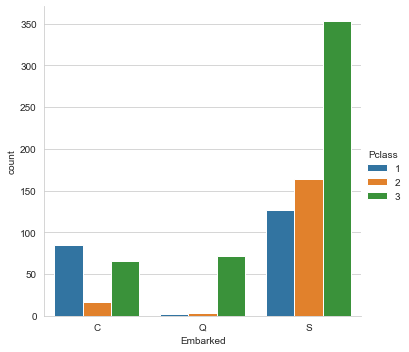

In [30]:
sns.factorplot('Embarked',data=titanic_df,kind='count',hue='Pclass',order=['C','Q','S'])

### Who was alone
### Who was with family

In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [ ]:
# SibSp 0 + Parch 0 = Alone

In [32]:
# let's check out those 0
# create new column named alone
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [33]:
# If alone contains more than o, then it's with family
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

# if alone contains equal to zero, then it's alone
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


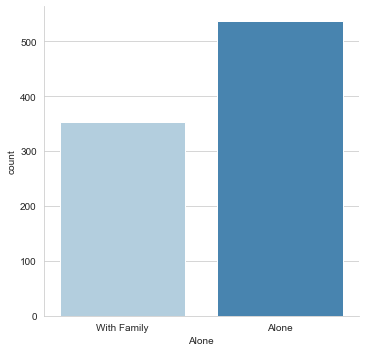

In [36]:
sns.factorplot('Alone',data=titanic_df,kind='count',palette='Blues')

### Survivor

In [38]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

In [39]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


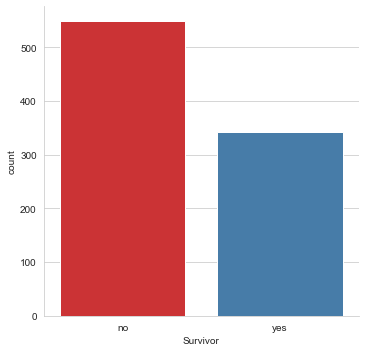

In [40]:
sns.factorplot('Survivor',data=titanic_df,kind='count',palette='Set1')

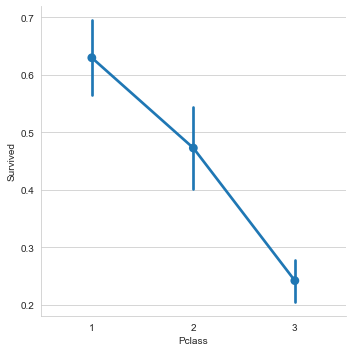

In [41]:
sns.factorplot('Pclass','Survived',data=titanic_df)

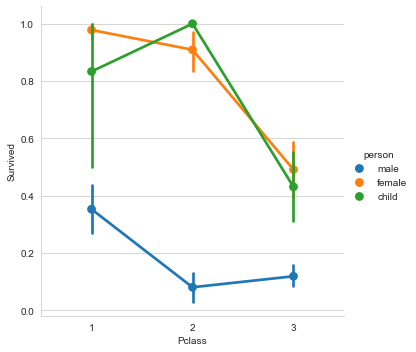

In [42]:
# find out the correlation of sex with survival
# we use the person as hue
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

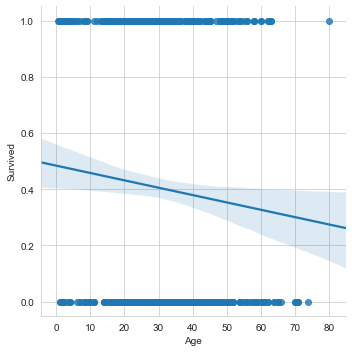

In [43]:
# find out the correlation of age with survival
# we use lmplot
sns.lmplot('Age','Survived',data=titanic_df)

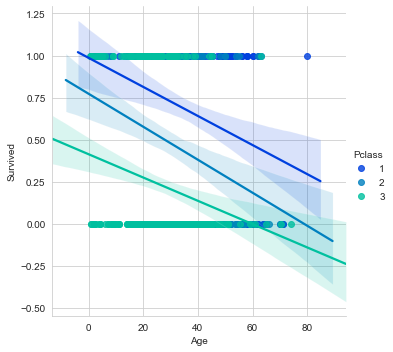

In [44]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

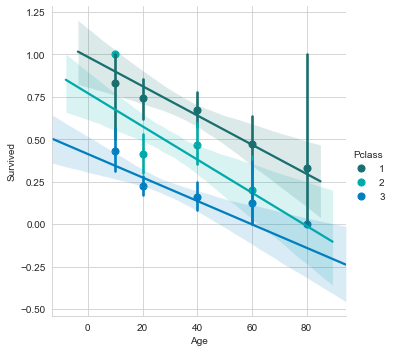

In [46]:
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter_d',x_bins=generations)

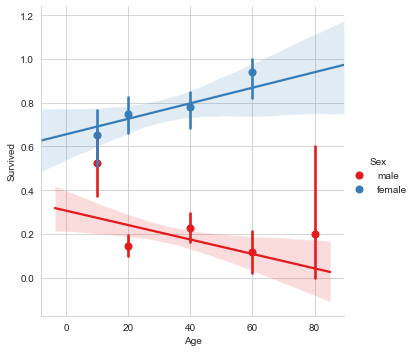

In [48]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='Set1',x_bins=generations)